In [1]:
# Import pandas
import pandas as pd
import matplotlib


In [3]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

<Axes: ylabel='neighbourhood'>

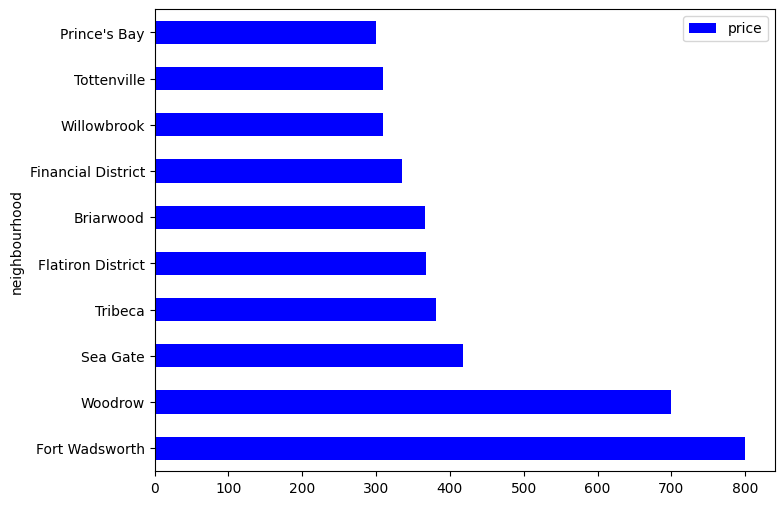

In [53]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.
def average_cost(row):
    return row.price.mean()

neighborhood_avg = df.groupby('neighbourhood').apply(average_cost).reset_index()
neighborhood_avg = neighborhood_avg.rename(columns={0:'price'})
neighborhood_avg = neighborhood_avg.sort_values(by='price', ascending=False).head(10)
top_10_expensive = neighborhood_avg.head(10)
top_10_expensive.plot.barh(x='neighbourhood', y='price', color='blue', figsize=(8,6))

In [54]:
# Now, display the top 10 datframe you cc reated as a table with columns
# neighbourhood and price
neighborhood_avg.head(10)

,neighbourhood,price
82,Fort Wadsworth,800.000000
220,Woodrow,700.000000
175,Sea Gate,418.230769
198,Tribeca,381.107143
75,Flatiron District,367.415584
22,Briarwood,366.162162
73,Financial District,335.385057
216,Willowbrook,309.000000
196,Tottenville,309.000000
158,Prince's Bay,300.000000


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

In [57]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
top_least_expensive = neighborhood_avg.sort_values(by='price', ascending=True).head(10)


In [45]:
# we also would like to have the corresponding pivot table of the lowest 10
df.pivot_table(index='neighbourhood', values='price').sort_values(by='price', ascending=True).head(10)

,price
neighbourhood,
South Beach,45.000000
Bull's Head,49.666667
Port Richmond,51.222222
Soundview,52.055556
New Brighton,52.250000
"Bay Terrace, Staten Island",55.000000
Hunts Point,56.583333
University Heights,57.826087
Grant City,58.400000


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!